In [1]:
%load_ext autoreload
%autoreload 2

### Switch to branch `workstation`

In [2]:
from l5pc.utils.simulation_utils import (
    assemble_prior,
    assemble_simulator,
    assemble_db,
    write_to_dj,
)
import dill
import pickle
import torch
from l5pc.model import (
    Priorl5pc,
    simulate_l5pc,
    setup_l5pc,
    summstats_l5pc,
    setup_l5pc,
)
from os.path import join
from sbi.analysis import pairplot
from l5pc.model.utils import return_gt, return_x_names, return_names
import numpy as np
from torch import as_tensor, ones, zeros, eye, float32
from l5pc.utils.common_utils import load_posterior
from l5pc.model.utils import return_gt, return_names, return_xo
from sbi.utils import BoxUniform
from sbi.utils.support_posterior import PosteriorSupport
from omegaconf import DictConfig
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from l5pc.utils.model_utils import (
    replace_nan,
    add_observation_noise,
)
from l5pc.utils.common_utils import (
    load_prior,
    extract_bounds,
    load_posterior,
)
from l5pc.utils.evaluation_utils import (
    predictive_traces,
    plot_traces,
    plot_summstats,
    compare_gt_log_probs,
    gt_log_prob,
    coverage,
    plot_coverage,
)
from l5pc.model import L5PC_20D_theta, L5PC_20D_x

Connecting root@134.2.168.121:3306


--No graphics will be displayed.


In [3]:
setup_l5pc()

Loading neuron libraries
Successfully loaded libraries!


## Panel D

In [9]:
theta = return_gt()

In [10]:
xo = simulate_l5pc(theta)

In [11]:
inference, posterior, used_features, round_ = load_posterior("l20_7", "2022_05_08__08_59_11_snpe")

In [125]:
_ = torch.manual_seed(7)  # 5 was best
theta = posterior.sample((10,))
theta = pd.DataFrame(theta.numpy(), columns=return_names())
trace = simulate_l5pc(theta)

Drawing 3 posterior samples:   0%|          | 0/3 [00:00<?, ?it/s]

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

Drawing 2 posterior samples:   0%|          | 0/2 [00:00<?, ?it/s]

Drawing 2 posterior samples:   0%|          | 0/2 [00:00<?, ?it/s]

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

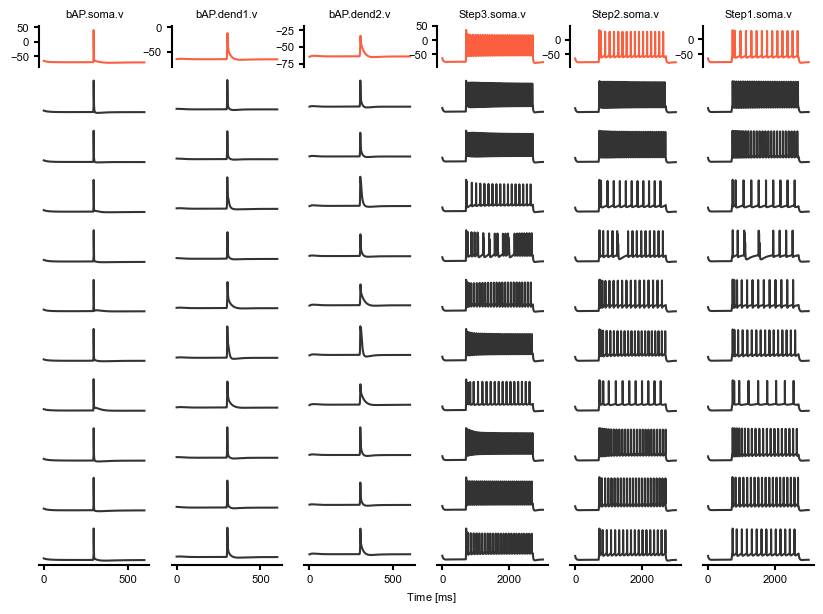

In [126]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    plot_traces(trace, xo[0], figsize=(10, 7))
    plt.savefig("../svg/panel_appendix2.svg")

# Assemble figure

In [127]:
import svgutils.transform as sg
import sys 

fig = sg.SVGFigure("16cm", "6.5cm")
fig1 = sg.fromfile('../svg/panel_appendix2.svg')
plot1 = fig1.getroot()
plot1.rotate(90)
fig.append(plot1)
fig.save("../svg/panel_appendix2.svg")

In [128]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [129]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("15.7cm", "19.5cm",

    Panel(
          SVG("../svg/panel_appendix2.svg").scale(svg_scale),
    ).move(570, -5),
)

f.save("../fig/fig5_appendix2.svg")
svg('../fig/fig5_appendix2.svg')